In [3]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [5]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + np.random.randn(size) * sigma
Y.size

100

In [44]:
k=pd.read_csv(r"C:\Users\li_wn\Documents\Research\premia1.csv",header=0,parse_dates=[0],index_col=0)

In [45]:
ret=k.iloc[:,0]
x1=k.iloc[:,1]
x2=k.iloc[:,2]
x3=k.iloc[:,3]
x4=k.iloc[:,4]
x5=k.iloc[:,5]
x6=k.iloc[:,6]
x7=k.iloc[:,7]
x8=k.iloc[:,8]
x9=k.iloc[:,9]
x10=k.iloc[:,10]
x11=k.iloc[:,11]
x12=k.iloc[:,12]
x13=k.iloc[:,13]
x14=k.iloc[:,14]
x15=k.iloc[:,15]
x16=k.iloc[:,16]

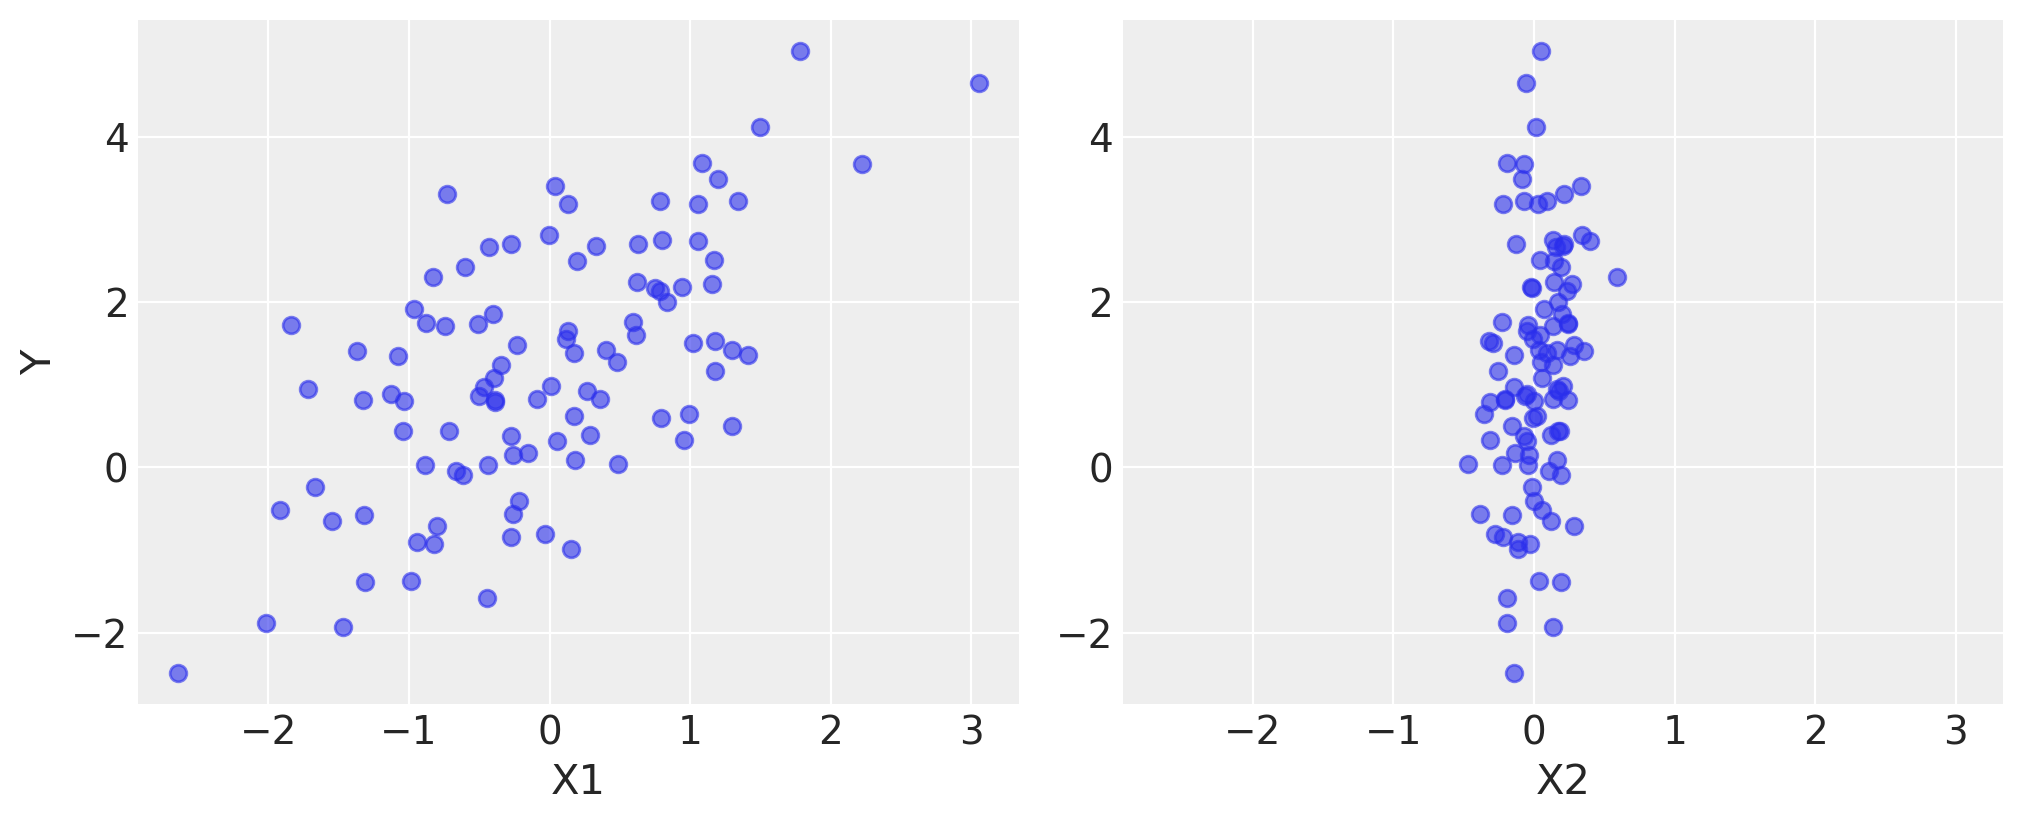

In [14]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

In [8]:
import pymc3 as pm

print(f"Running on PyMC3 v{pm.__version__}")

Running on PyMC3 v3.9.3


In [46]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    #beta = pm.Normal("beta", mu=0, sigma=10, shape=16)
    #beta=pm.Uniform("beta",lower = 0, upper = 1,shape=16)
    beta = pm.Dirichlet('beta', a=np.ones(16))
    sigma = pm.HalfNormal("sigma", sigma=1)
    #sigma = pm.Normal("sigma", mu=0,sigma=3)

    # Expected value of outcome
    #mu = alpha + beta[0] * X1 + beta[1] * X2
    mu = alpha+beta[0]*x1+beta[1]*x2+beta[2]*x3+beta[3]*x4+beta[4]*x5+beta[5]*x6+beta[6]*x7+beta[7]*x8+beta[8]*x9+beta[9]*x10+beta[10]*x11+beta[11]*x12+beta[12]*x13+beta[13]*x14+beta[14]*x15+beta[15]*x16
 
    # Likelihood (sampling distribution) of observations
    #Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=ret)

In [47]:
map_estimate = pm.find_MAP(model=basic_model)
#map_estimate['beta']
mm=pd.DataFrame(map_estimate['beta'])
mm.to_excel(r"C:\Users\li_wn\Documents\Research\wgted_output_map_cons.xlsx",index=True,header=True)
map_estimate

{'alpha': array(-0.04077532),
 'beta_stickbreaking__': array([-3.00564459e+01, -1.50661379e+01,  1.78275702e+00,  3.74326950e-01,
        -1.37919454e+01,  4.64456263e+01,  3.49660288e+00,  2.95134152e+00,
        -1.53009423e-01, -1.58179221e-01, -1.41700061e-01,  3.70705740e-01,
        -2.85209451e-02,  7.02539239e-01,  3.99919633e-02]),
 'sigma_log__': array(-0.41576554),
 'beta': array([6.11808107e-15, 2.04517948e-08, 3.13847574e-01, 7.41543945e-02,
        5.69628237e-08, 6.11997954e-01, 1.06773558e-16, 2.05317889e-17,
        9.37552391e-19, 9.52628314e-19, 9.90262212e-19, 1.51690299e-18,
        1.02480095e-18, 1.58910261e-18, 8.02860981e-19, 7.71386551e-19]),
 'sigma': array(0.65983496)}

In [34]:
map_estimate = pm.find_MAP(model=basic_model, method="powell")
map_estimate

C:\Users\li_wn\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:517: RuntimeWarning: Method powell does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


{'alpha': array(0.01370241),
 'beta_stickbreaking__': array([ 0.20752074, 44.94018841,  9.87437098,  9.87437098,  9.87437098,
         9.87437098,  9.87437098,  9.87437098,  9.87437098,  9.87437098,
         9.87437098,  9.87437098,  9.87437098,  9.87437098,  9.87437098]),
 'sigma_log__': array(0.66412182),
 'beta': array([7.58210710e-02, 9.24178929e-01, 2.05071710e-16, 1.37150087e-19,
        8.46733332e-23, 4.79215668e-26, 2.46572718e-29, 1.14188901e-32,
        4.70080879e-36, 1.69336930e-39, 5.22885187e-43, 1.34555700e-46,
        2.77019411e-50, 4.27761722e-54, 4.40377105e-58, 2.26693937e-62]),
 'sigma': array(1.94278365)}

In [48]:
with basic_model:
    # draw 500 posterior samples
    trace = pm.sample(8000, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


Sampling 4 chains for 1_000 tune and 8_000 draw iterations (4_000 + 32_000 draws total) took 63 seconds.


In [42]:
with basic_model:
    # instantiate sampler
    step = pm.Slice()

    # draw 5000 posterior samples
    trace = pm.sample(8000, step=step, return_inferencedata=False)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [sigma]
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 8_000 draw iterations (4_000 + 32_000 draws total) took 131 seconds.


C:\Users\li_wn\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-16-05a080a79484>:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout();


<Figure size 700x700 with 0 Axes>

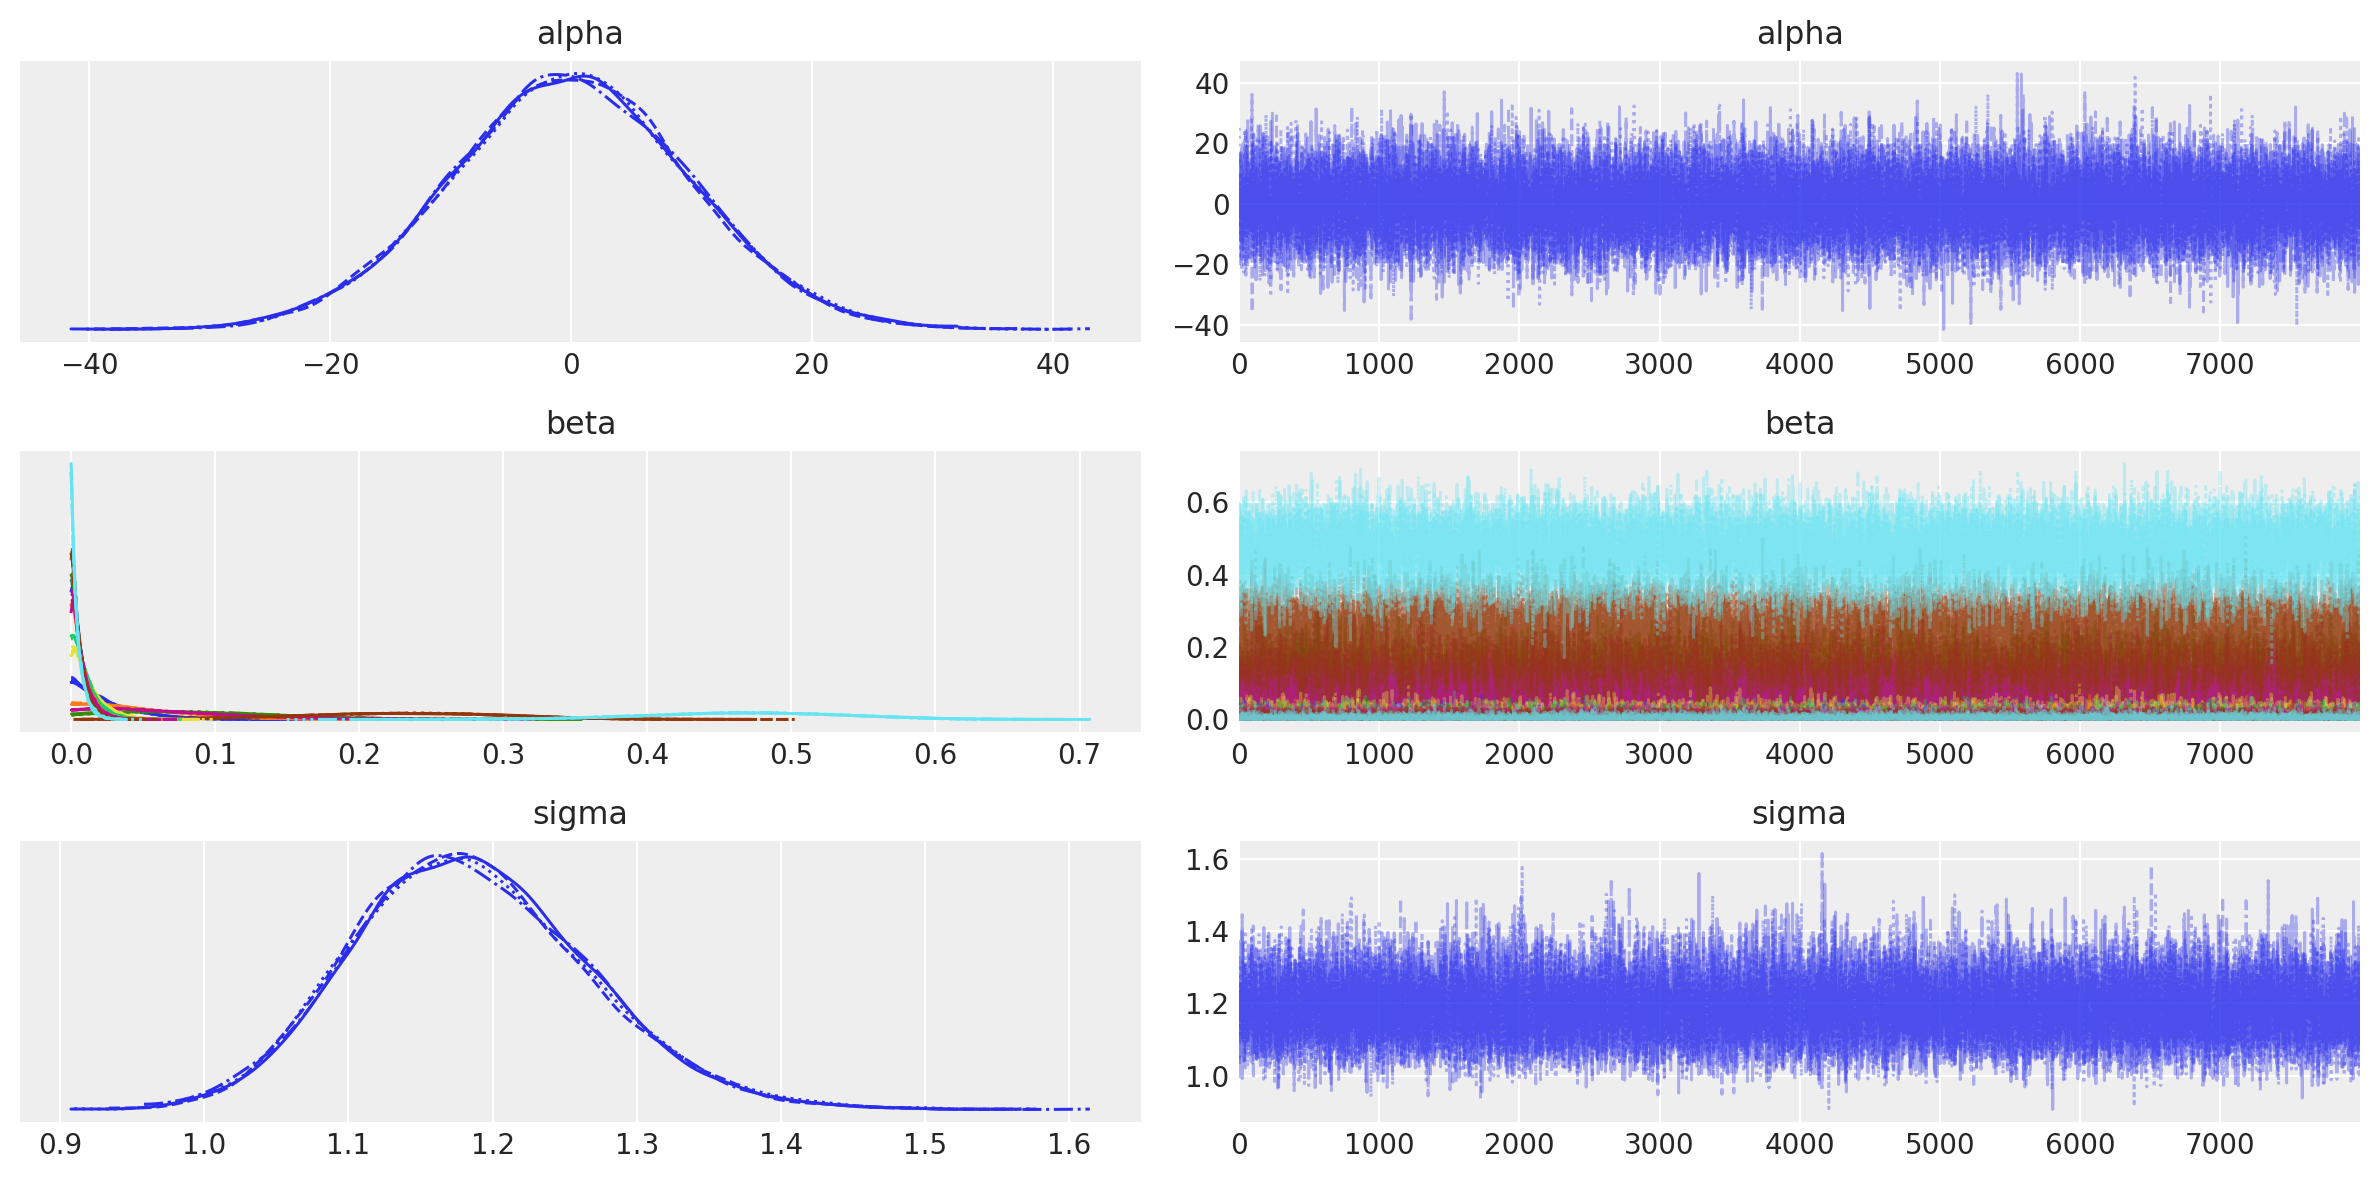

In [16]:
plt.figure(figsize=(7, 7))
pm.traceplot(trace)
plt.tight_layout();

In [49]:
with basic_model:
    dd=az.summary(trace,round_to=6)
    dd.to_excel(r"C:\Users\li_wn\Documents\Research\wgted_output_Cons_nuts.xlsx",index=True,header=True)
    display(az.summary(trace, round_to=2))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,-0.02,0.07,-0.15,0.11,0.0,0.0,27668.59,17501.52,27685.52,22184.06,1.0
beta[0],0.02,0.02,0.00,0.06,0.0,0.0,30527.90,28631.41,20625.57,13054.34,1.0
beta[1],0.05,0.04,0.00,0.12,0.0,0.0,28010.10,28010.10,15967.29,10564.78,1.0
beta[2],0.13,0.07,0.00,0.24,0.0,0.0,14226.84,14226.84,12947.00,11288.06,1.0
beta[3],0.11,0.08,0.00,0.26,0.0,0.0,16580.59,16580.59,12404.02,9418.23,1.0
beta[4],0.13,0.08,0.00,0.26,0.0,0.0,17931.38,17931.38,15322.41,10456.35,1.0
beta[5],0.50,0.08,0.35,0.64,0.0,0.0,18083.10,17725.31,17789.69,21351.49,1.0
beta[6],0.01,0.01,0.00,0.03,0.0,0.0,31523.97,29598.55,23904.15,15233.82,1.0
beta[7],0.01,0.01,0.00,0.02,0.0,0.0,29575.60,27414.92,22884.37,14528.30,1.0
beta[8],0.01,0.01,0.00,0.01,0.0,0.0,34009.87,31333.44,22838.01,11458.36,1.0


In [23]:
basic_model = pm.Model()
with basic_model:
 beta = pm.Normal("beta", mu=0, sigma=10, shape=2)

In [31]:
map_estimate['beta']

array([2.50905447e-09, 8.45001410e-02, 2.32265269e-01, 2.79241128e-07,
       1.34152079e-01, 5.49082230e-01, 1.21898265e-16, 2.24698723e-20,
       2.66358978e-25, 4.95233409e-27, 3.14015121e-25, 9.49975695e-24,
       3.00350737e-25, 1.80895363e-24, 8.98415782e-26, 1.82531115e-26])

In [45]:
mm=kk.T